In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [4]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.shape 

(10000, 14)

In [7]:
#No null values in the dataset 


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<h4>EDA</h4>

In [21]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<h4>Infernce- We won't need the first two columns as they are unique to each customer </h4>

In [50]:
categorical_variables=[x for x in df.columns if df[x].dtype=='O']
numerical_variables=[x for x in df.columns if df[x].dtype!='O'][2:]

In [51]:
categorical_variables

['Surname', 'Geography', 'Gender']

In [52]:
numerical_variables

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# Target Variable 

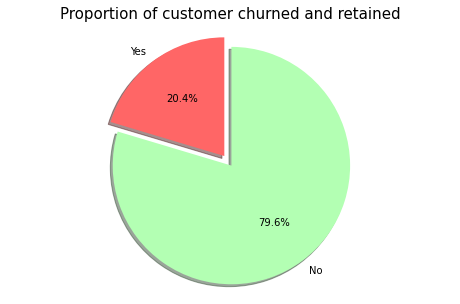

In [46]:
labels = 'Yes', 'No'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#ff6666","#b3ffb3"])
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

<h4>Inference=About 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.</h4>

# Categorical discrete EDA

<h4>Inference- The data does not show any major trend in the surnames hence the variable does not show much relevance</h4> 

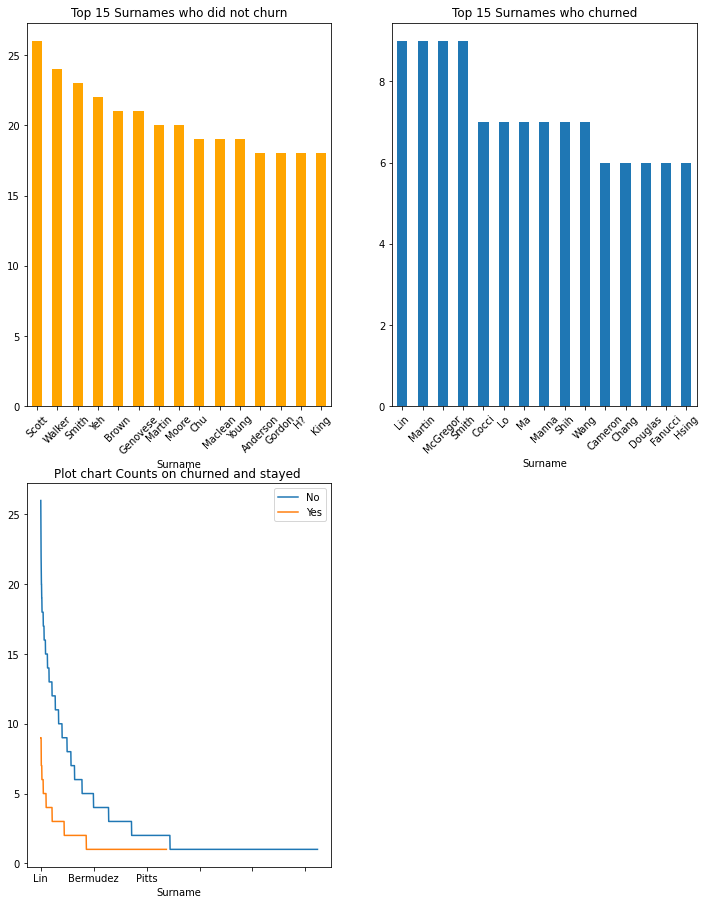

In [172]:
fig = plt.figure(figsize=(12,24))

plt.subplot(3, 2, 1)
df.groupby('Exited')['Surname'].value_counts().loc[0].iloc[:15].plot.bar(color=['orange'])
plt.title("Top 15 Surnames who did not churn")
plt.xticks(rotation=45)
plt.subplot(3, 2, 2)
df.groupby('Exited')['Surname'].value_counts().loc[1].iloc[:15].plot.bar()
plt.title("Top 15 Surnames who churned")
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)
df.groupby('Exited')['Surname'].value_counts().loc[0].plot()
df.groupby('Exited')['Surname'].value_counts().loc[1].plot()
plt.legend(["No",'Yes'])
plt.title('Plot chart Counts on churned and stayed ')

plt.show()

<h4>Inference-From above we can see that the  Surname variable does not have any relation with the target variable</h4> 

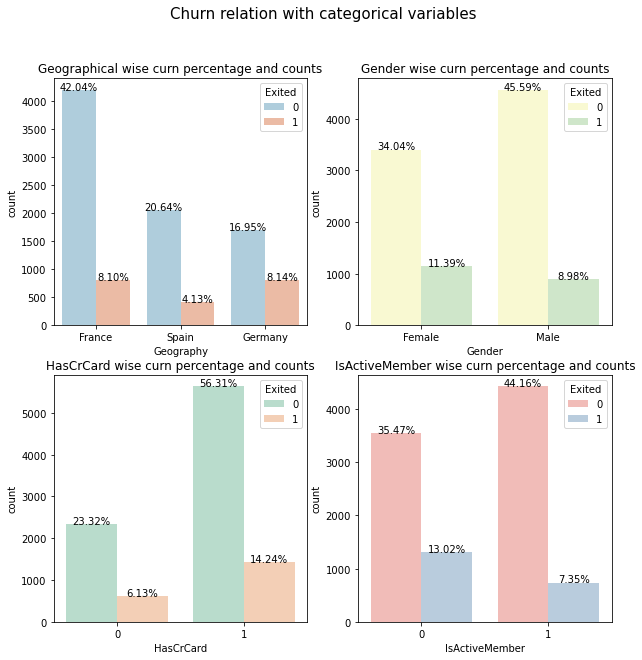

In [100]:
fig = plt.figure(figsize=(10,10))
plt.suptitle("Churn relation with categorical variables",fontsize=15)

plt.subplot(2, 2, 1)
total = len(df.Geography)
g=sns.countplot(df['Geography'],hue=df.Exited,palette='RdBu_r')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10)
plt.title("Geographical wise curn percentage and counts")


plt.subplot(2, 2, 2)
total = len(df.Gender)
g=sns.countplot(df['Gender'],hue=df.Exited,palette='Pastel1_r')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10)
plt.title("Gender wise curn percentage and counts")

plt.subplot(2, 2, 3)
total = len(df.HasCrCard)
g=sns.countplot(df['HasCrCard'],hue=df.Exited,palette='Pastel2')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10)
plt.title("HasCrCard wise curn percentage and counts")

plt.subplot(2, 2, 4)
total = len(df.IsActiveMember)
g=sns.countplot(df['IsActiveMember'],hue=df.Exited,palette='Pastel1')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10)
plt.title("IsActiveMember wise curn percentage and counts")

plt.show()

<h4>Inference-</h4>

<h4>Majority of the data is from persons from France.</h4>
<h4>However, the proportion of churned customers is with inversely related to the population of customers coming to the bank
possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.</h4>
<h4>The proportion of female customers churning is also greater than that of male customers
Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.</h4>
<h4>Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.</h4>

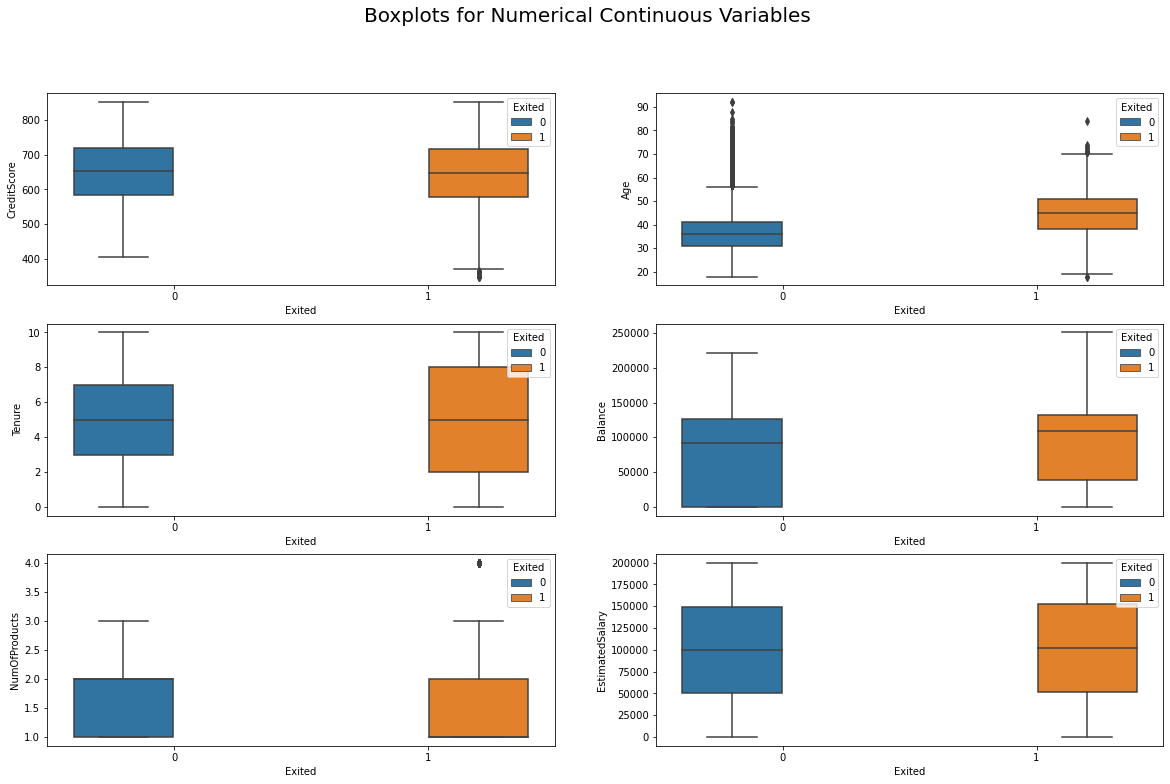

In [177]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
plt.suptitle("Boxplots for Numerical Continuous Variables",fontsize=20)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
plt.show()

<h4>Inference-</h4>


<h4>There is no significant difference in the credit score distribution between retained and churned customers.</h4>
<h4>The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups</h4>
<h4>With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.</h4>
<h4>Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.</h4>
<h4>Neither the product nor the salary has a significant effect on the likelihood to churn.</h4>

<h2>Feature engineering</h2>


<h4>We wish to add features that are likely to have an impact on the probability of churning. </h4>

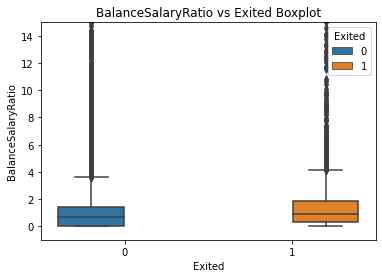

In [178]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 15)
plt.title("BalanceSalaryRatio vs Exited Boxplot")
plt.show()

<h4>We have already seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.</h4>

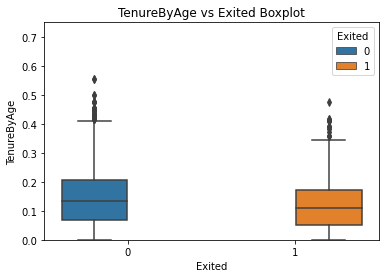

In [179]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(0, 0.75)
plt.title("TenureByAge vs Exited Boxplot")
plt.show()

<h4>Inference- The data does not show much variation but we can see that customers churned have stayed for lesser than 2 months majorly so the bank needs to look into clients who churn out after 2 months</h4> 

<h3>Let's introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life</h3>

In [112]:

df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

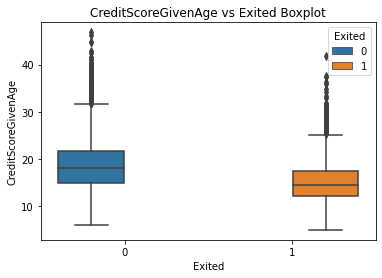

In [180]:

sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df)
plt.title("CreditScoreGivenAge vs Exited Boxplot")
plt.show()

<h4>Inference- From here we can see that the customers whi churned out have lesser CreditScoreGivenAge and this may be due to customers bad relationship with the bank or payment irregularities or because of cutomers dissatisfaction</h4> 

In [117]:
df.to_csv("After_EDA.csv",index=False)